In [89]:
import pandas as pd
import numpy as np

In [90]:
def minmaxscaler(data):
    min_values = data.min()
    max_values = data.max()
    
    scaled_data = (data - min_values) / (max_values - min_values)
    
    return scaled_data
def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1. / (1 + np.exp(-h.astype(float)))

class MyLogisticRegression(object):
    def __init__(self):
        self.w = None

    def fit(self, X, y, max_iter=100, lr=0.1):
        # Принимает на вход X, y и вычисляет веса по данной выборке.
        # Множество допустимых классов: {1, -1}
        # Не забудьте про фиктивный признак равный 1!

        n, k = X.shape

        if self.w is None:
            self.w = np.random.randn(k + 1).astype(float)

        X_train = np.concatenate((np.ones((n, 1)), X), axis=1).astype(float)

        losses = []

        for iter_num in range(max_iter):
            z = sigmoid(logit(X_train, self.w))
            grad = np.dot(X_train.T, (z - y)) / len(y)

            self.w -= grad * lr

            losses.append(self.__loss(y, z))

        return losses

    def predict_proba(self, X):
        # Принимает на вход X и возвращает ответы модели
        n, k = X.shape
        X_ = np.concatenate((np.ones((n, 1)), X), axis=1)
        return sigmoid(logit(X_, self.w))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold

    def get_weights(self):
        return self.w

    def __loss(self, y, p):
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))


In [91]:
target_data = pd.read_csv('gender_submission.csv')
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [92]:
target_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [93]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
test_data['Survived'] = target_data['Survived']
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [95]:
full_data = pd.concat([train_data, test_data], axis=0)
full_data.drop('PassengerId', axis=1, inplace=True)
full_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
for col in ['Sex', 'Embarked', 'Cabin']:
    print(f"{col} DISTRIBUTION")
    print(full_data[col].value_counts())
    print()

Sex DISTRIBUTION
Sex
male      843
female    466
Name: count, dtype: int64

Embarked DISTRIBUTION
Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

Cabin DISTRIBUTION
Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F33                4
F4                 4
                  ..
C39                1
B24                1
D40                1
D38                1
C105               1
Name: count, Length: 186, dtype: int64



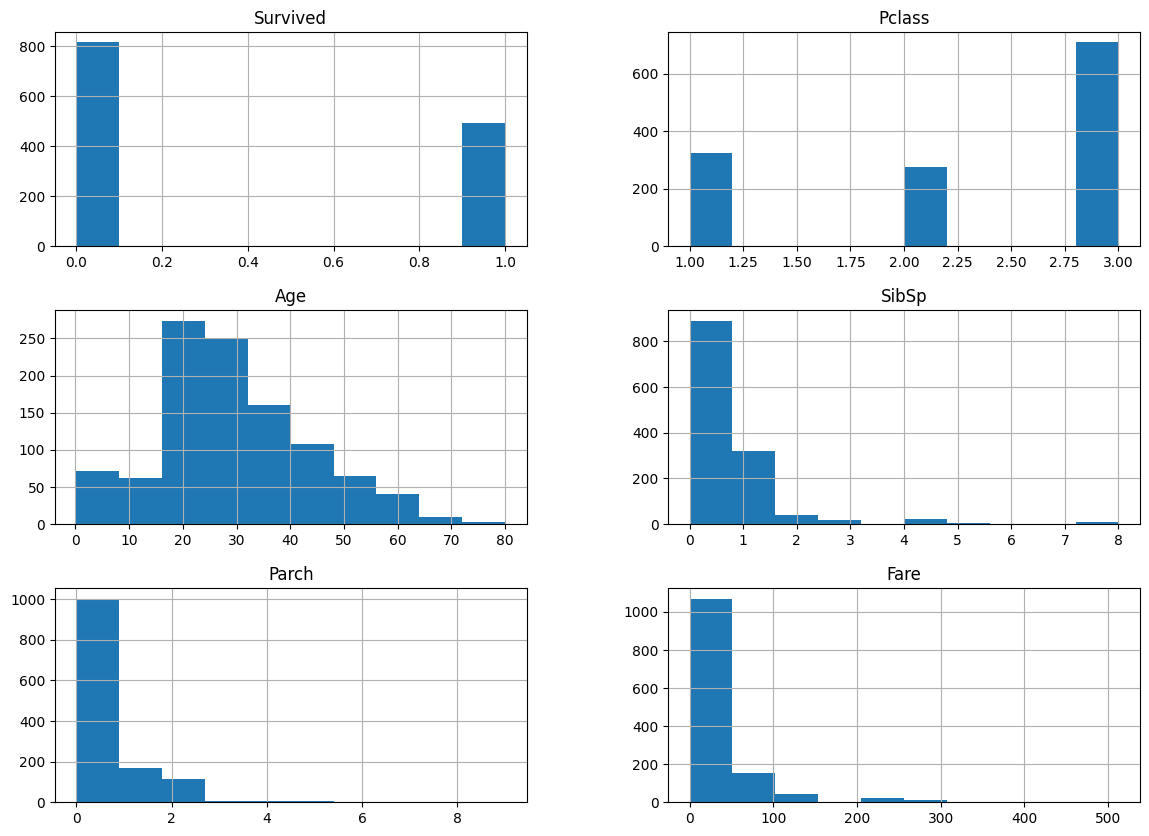

In [97]:
full_data.hist(column=full_data.columns, figsize=(14, 10))
None

# Обработка данных

In [98]:
full_data.isna().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [99]:
full_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
full_data.Age=full_data.Age.fillna(full_data.Age.mean())


In [100]:
full_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [101]:
full_data = pd.get_dummies(full_data, columns=['Sex', 'Embarked'])
full_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


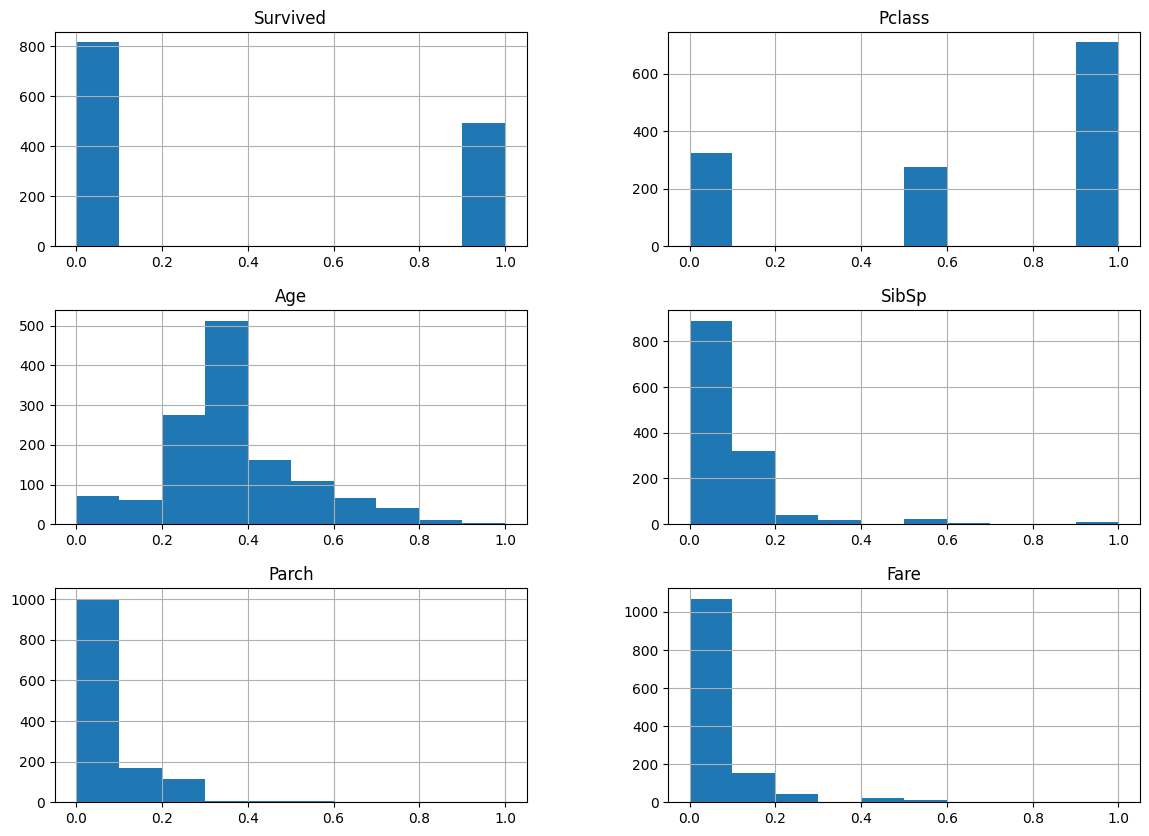

In [102]:
full_data_scaled = full_data[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']].apply(minmaxscaler)
full_data[full_data_scaled.columns] = full_data_scaled
full_data.hist(column=full_data.columns, figsize=(14, 10))
None

In [103]:
X_train = full_data.drop('Survived', axis=1).iloc[:train_data.shape[0]]
y_train = full_data.Survived.iloc[:train_data.shape[0]].values
X_test = full_data.drop('Survived', axis=1).iloc[train_data.shape[0]:]
y_test = full_data.Survived.iloc[train_data.shape[0]:].values



In [104]:
lr_list = [0.1, 0.2, 0.3]
max_iter = [100, 500, 1000]

In [105]:
def calculate_confusion_matrix(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    true_negative = np.sum((y_true == 0) & (y_pred == 0))
    false_positive = np.sum((y_true == 0) & (y_pred == 1))
    false_negative = np.sum((y_true == 1) & (y_pred == 0))
    
    return true_positive, true_negative, false_positive, false_negative

def accuracy_score(y_true, y_pred):
    tp, tn, fp, fn = calculate_confusion_matrix(y_true, y_pred)
    return (tp + tn) / (tp + tn + fp + fn)

def precision_score(y_true, y_pred):
    tp, _, fp, _ = calculate_confusion_matrix(y_true, y_pred)
    return tp / (tp + fp) if (tp + fp) > 0 else 0

def recall_score(y_true, y_pred):
    tp, _, _, fn = calculate_confusion_matrix(y_true, y_pred)
    return tp / (tp + fn) if (tp + fn) > 0 else 0

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

In [106]:
for lr in lr_list:
    for iter in max_iter:
        model = MyLogisticRegression()
        model.fit(X_train, y_train, max_iter=iter, lr=lr)
        y_pred = model.predict(X_test)
        
        cm = calculate_confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        print(f"LR: {lr}, Max Iter: {iter}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print(f"TP: {int(cm[0])}, TN: {int(cm[1])}, FP: {int(cm[2])}, FN: {int(cm[3])}")
        print("-" * 20)
       

LR: 0.1, Max Iter: 100
Accuracy: 0.9976
Precision: 1.0000
Recall: 0.9934
F1-Score: 0.9967
TP: 151, TN: 266, FP: 0, FN: 1
--------------------
LR: 0.1, Max Iter: 500
Accuracy: 0.9928
Precision: 0.9934
Recall: 0.9868
F1-Score: 0.9901
TP: 150, TN: 265, FP: 1, FN: 2
--------------------
LR: 0.1, Max Iter: 1000
Accuracy: 0.9761
Precision: 0.9494
Recall: 0.9868
F1-Score: 0.9677
TP: 150, TN: 258, FP: 8, FN: 2
--------------------


LR: 0.2, Max Iter: 100
Accuracy: 0.9211
Precision: 0.9407
Recall: 0.8355
F1-Score: 0.8850
TP: 127, TN: 258, FP: 8, FN: 25
--------------------
LR: 0.2, Max Iter: 500
Accuracy: 0.9641
Precision: 0.9363
Recall: 0.9671
F1-Score: 0.9515
TP: 147, TN: 256, FP: 10, FN: 5
--------------------
LR: 0.2, Max Iter: 1000
Accuracy: 0.9617
Precision: 0.9250
Recall: 0.9737
F1-Score: 0.9487
TP: 148, TN: 254, FP: 12, FN: 4
--------------------
LR: 0.3, Max Iter: 100
Accuracy: 0.9689
Precision: 0.9317
Recall: 0.9868
F1-Score: 0.9585
TP: 150, TN: 255, FP: 11, FN: 2
--------------------
LR: 0.3, Max Iter: 500
Accuracy: 0.9761
Precision: 0.9437
Recall: 0.9934
F1-Score: 0.9679
TP: 151, TN: 257, FP: 9, FN: 1
--------------------
LR: 0.3, Max Iter: 1000
Accuracy: 0.9569
Precision: 0.9295
Recall: 0.9539
F1-Score: 0.9416
TP: 145, TN: 255, FP: 11, FN: 7
--------------------
